In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
# Load CIC 2018 dataset
cic_data = None
cic_labels = None

for file in list(glob.glob('/home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/Hulk-Slowloris/*.csv')):
    print('Loading ', file, '...')
    df = pd.read_csv(file, dtype=str, skipinitialspace=True)  # Read in data from csv file

    attack = df.loc[df['Label'].str.contains('hulk|slowloris', case=False)].copy()  # Only get DoS related attacks
    benign = df.loc[df['Label'].str.contains('benign', case=False)].copy()  # Get all benign traffic

    data = pd.concat([attack, benign]).drop(['Label'], axis=1)  # Concatenate attack/benign and separate label from data
    labels = pd.concat([attack, benign])['Label']  # Save labels by themselves

    # Remove unused columns if present
    if 'Timestamp' in data:
        data = data.drop('Timestamp', axis=1)
    if 'Flow ID' in data:
        data = data.drop('Flow ID', axis=1)
    if 'Src IP' in data:
        data = data.drop('Src IP', axis=1)
    if 'Src Port' in data:
        data = data.drop('Src Port', axis=1)
    if 'Dst IP' in data:
        data = data.drop('Dst IP', axis=1)

    if cic_data is None:
        cic_data = data
        cic_labels = labels
    else:
        cic_data = pd.concat([cic_data, data])
        cic_labels = pd.concat([cic_labels, labels])

cic_data.head()

Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/Hulk-Slowloris/02-16-2018.csv ...


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
91700,80,6,1793,3,4,364,935,364,0,121.3333333,...,1,32,0,0,0,0,0,0,0,0
91701,80,6,1720,3,4,300,935,300,0,100,...,1,32,0,0,0,0,0,0,0,0
91702,80,6,191,2,0,0,0,0,0,0,...,0,32,0,0,0,0,0,0,0,0
91703,80,6,912,3,4,359,935,359,0,119.6666667,...,1,32,0,0,0,0,0,0,0,0
91704,80,6,1869,3,4,384,935,384,0,128,...,1,32,0,0,0,0,0,0,0,0


In [3]:
# Load USB 2021 dataset
usb_data = None
usb_labels = None

for file in list(glob.glob('/home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/*.csv')):
    print('Loading ', file, '...')
    df = pd.read_csv(file, dtype=str, skipinitialspace=True)  # Read in data from csv file

    attack = df.loc[df['Label'].str.contains('hulk|slowloris', case=False)].copy()  # Only get hulk/slowloris attacks
    benign = df.loc[df['Label'].str.contains('benign', case=False)].copy()  # Get all benign traffic

    data = pd.concat([attack, benign]).drop(['Label'], axis=1)  # Concatenate attack/benign and separate label from data
    labels = pd.concat([attack, benign])['Label']  # Save labels by themselves

    # Remove unused columns if present
    if 'Timestamp' in data:
        data = data.drop('Timestamp', axis=1)
    if 'Flow ID' in data:
        data = data.drop('Flow ID', axis=1)
    if 'Src IP' in data:
        data = data.drop('Src IP', axis=1)
    if 'Src Port' in data:
        data = data.drop('Src Port', axis=1)
    if 'Dst IP' in data:
        data = data.drop('Dst IP', axis=1)

    if usb_data is None:
        usb_data = data
        usb_labels = labels
    else:
        usb_data = pd.concat([usb_data, data])
        usb_labels = pd.concat([usb_labels, labels])

usb_data.head()

Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Slowloris-Security2.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Slowloris-Evasive.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Hulk-Reqtimeout.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Hulk-NoDefense.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Slowloris-NoDefense.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Hulk-Evasive.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Slowloris-Reqtimeout.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/Hulk-Slowloris/Hulk-Security2.csv ...


,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
3,80,6,102254714,10,9,255.0,0.0,168.0,0.0,25.499999999999996,...,8,32,309.6666666666667,167.36028999337526,651.0,234.0,1.7042102333333332E7,4857899.74726036,1.9025448E7,7125956.0
4,80,6,102254251,10,9,252.0,0.0,168.0,0.0,25.2,...,8,32,242.33333333333331,66.08681159404398,377.0,211.0,1.7042097E7,4857977.967620891,1.902547E7,7125791.0
5,80,6,102253974,10,9,250.0,0.0,168.0,0.0,25.0,...,8,32,253.16666666666666,129.31421680026781,517.0,196.0,1.7042042666666664E7,4858147.79889701,1.9025481E7,7125390.0
6,80,6,102253651,10,9,254.0,0.0,168.0,0.0,25.4,...,8,32,257.3333333333333,159.55270811448693,583.0,190.0,1.70419855E7,4858307.91381167,1.9025483E7,7125006.0
7,80,6,102253232,10,9,254.0,0.0,168.0,0.0,25.4,...,8,32,207.5,63.65139432879691,337.0,174.0,1.7041967833333332E7,4858377.642711337,1.9025503E7,7124846.0


## Display Statistical Measures

In [4]:
# Display CIC statistical measures
cic_data.astype(dtype=float).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dst Port,908684.0,2.309963e+04,2.409752e+04,0.0,80.0,80.0,46440.0,60998.0
Protocol,908684.0,5.999112e+00,9.173160e-02,0.0,6.0,6.0,6.0,17.0
Flow Duration,908684.0,2.807154e+06,6.555864e+06,2.0,12038.0,230168.0,4304329.0,112641773.0
Tot Fwd Pkts,908684.0,3.556533e+00,1.502095e+00,1.0,2.0,3.0,5.0,229.0
Tot Bwd Pkts,908684.0,1.756304e+00,2.238625e+00,0.0,0.0,3.0,3.0,889.0
...,...,...,...,...,...,...,...,...
Active Min,908684.0,1.789670e+02,1.441084e+04,0.0,0.0,0.0,0.0,7247162.0
Idle Mean,908684.0,9.034500e+05,6.314630e+06,0.0,0.0,0.0,0.0,91300000.0
Idle Std,908684.0,1.055210e+02,3.997255e+04,0.0,0.0,0.0,0.0,24800000.0
Idle Max,908684.0,9.035302e+05,6.314970e+06,0.0,0.0,0.0,0.0,91300000.0


In [5]:
# Display USB statistical measures
usb_data.astype(dtype=float).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dst Port,3289226.0,7.999924e+01,4.934445e+00,0.0,80.0,80.0,80.0,7.680000e+03
Protocol,3289226.0,5.999978e+00,7.088218e-02,0.0,6.0,6.0,6.0,1.700000e+01
Flow Duration,3289226.0,1.013149e+06,4.792526e+06,0.0,264005.0,504157.0,883928.0,1.199997e+08
Total Fwd Packet,3289226.0,7.271642e+00,2.097091e+00,1.0,6.0,7.0,8.0,5.420000e+02
Total Bwd packets,3289226.0,5.489364e+00,9.714010e-01,0.0,5.0,5.0,6.0,2.500000e+01
...,...,...,...,...,...,...,...,...
Active Min,3289226.0,6.514969e+03,1.275990e+05,0.0,0.0,0.0,0.0,8.520182e+07
Idle Mean,3289226.0,1.782261e+05,1.491248e+06,0.0,0.0,0.0,0.0,1.157083e+08
Idle Std,3289226.0,9.181529e+03,2.300362e+05,0.0,0.0,0.0,0.0,3.181608e+07
Idle Max,3289226.0,1.854943e+05,1.572484e+06,0.0,0.0,0.0,0.0,1.157083e+08


## Display Unique Protocols

In [6]:
# Display CIC unique protocols
cic_data['Protocol'].astype(dtype=int).unique()

array([ 6,  0, 17])

In [7]:
# Display USB unique protocols
usb_data['Protocol'].astype(dtype=int).unique()

array([ 6,  0, 17])

## View Destination Port Distribution

Text(0.5, 1.0, 'Destination Ports')

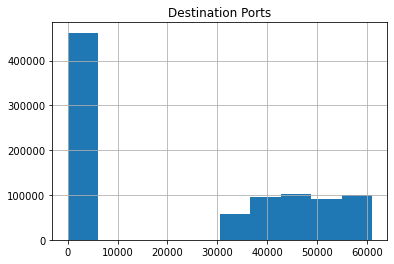

In [8]:
# View distribution of CIC destination ports
cic_data['Dst Port'].astype(dtype=int).hist()
plt.title('Destination Ports')

Text(0.5, 1.0, 'Destination Ports')

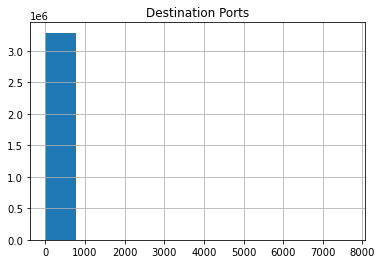

In [9]:
# View distribution of USB destination ports
usb_data['Dst Port'].astype(dtype=int).hist()
plt.title('Destination Ports')

Text(0.5, 1.0, 'Top 10 Destination Ports')

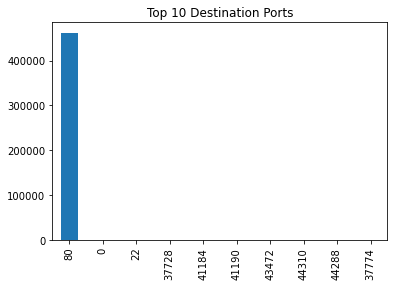

In [10]:
# View distribution of top 10 CIC destination ports
top_10 = cic_data['Dst Port'].astype(dtype=int).value_counts()[:10]
top_10.plot(kind='bar')
plt.title('Top 10 Destination Ports')

Text(0.5, 1.0, 'Top 10 Destination Ports')

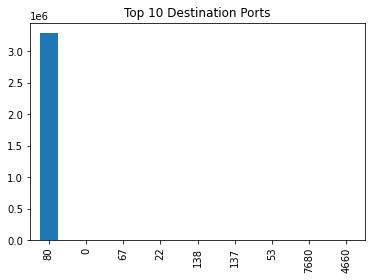

In [11]:
# View distribution of top 10 USB destination ports
top_10 = usb_data['Dst Port'].astype(dtype=int).value_counts()[:10]
top_10.plot(kind='bar')
plt.title('Top 10 Destination Ports')